# **Diabetes prediction, exploration of symptoms**

**by Harish Muhammad**

## **Problem Understanding**

### **Understanding Diabetes**

What is Diabetes?
Diabetes is a chronic disease that affects how your body turns food into energy. It occurs when your blood glucose, also known as blood sugar, is too high. There are three main types of diabetes: Type 1, Type 2, and gestational diabetes. Each type affects the body in different ways, but they all involve problems with insulin production or use.
Diabetes is one of the most important diseases
Global Impact: Diabetes affects millions of people worldwide. The World Health Organization (WHO) reports that about 422 million people have diabetes, particularly in low- and middle-income countries.
Health Risks: If not managed properly, diabetes can lead to serious complications such as heart disease, stroke, kidney failure, blindness, and lower limb amputation.
Rising Numbers: The prevalence of diabetes is steadily increasing, making early detection and management crucial.

### **Problem Statement**
Why an Early Diabetes Predictor App?
Early detection of diabetes can significantly improve the quality of life and reduce the risk of severe complications. Traditional methods for diagnosing diabetes often involve lab tests, which can be expensive and inconvenient. An app that predicts the risk of diabetes based on readily available symptoms can serve as an initial screening tool, providing an early warning and encouraging people to seek medical advice promptly.



**Dataset Source**
The idea for creating this app originated from the availability of a comprehensive dataset from the UCI Machine Learning Repository: the Early Stage Diabetes Risk Prediction Dataset. This dataset includes information collected through questionnaires from patients at the Sylhet Diabetes Hospital in Sylhet, Bangladesh, and it has been approved by medical professionals.

Data Source:[UCI](https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.)

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Data Splitting
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Preprocessing
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.pipeline import Pipeline

# Resampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTENC

# ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# metrics and reports
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score, classification_report, confusion_matrix, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, classification_report
from matplotlib.colors import LinearSegmentedColormap

# Hyperparameter tunning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Other libraries
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Customizing with 'ggplot' style
plt.style.use('ggplot')

In [3]:
# Load dataset
data = pd.read_csv("diabetes_data.csv")

data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### **Data Understanding**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
# Initial assessment
# Displaying maximum view
pd.set_option('display.max_colwidth', None)

# Check data types, missing values, negative values, unique values for each column
assessment_data = pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'missing_value_sum': data.isna().sum(),
    'missing_value_pct': round((data.isna().sum() / len(data)) * 100, 2),
    'negative_value': [(data[col] < 0).any() if data[col].dtype in ['int64', 'float64'] else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

assessment_data

,feature,data_type,missing_value_sum,missing_value_pct,negative_value,n_unique,sample_unique
Age,Age,int64,0,0.0,False,51,"[40, 58, 41, 45, 60, 55, 57, 66, 67, 70, 44, 38, 35, 61, 54, 43, 62, 39, 48, 32, 42, 52, 53, 37, 49, 63, 30, 50, 46, 36, 51, 59, 65, 25, 47, 28, 68, 56, 31, 85, 90, 72, 69, 79, 34, 16, 33, 64, 27, 29, 26]"
Gender,Gender,object,0,0.0,False,2,"[Male, Female]"
Polyuria,Polyuria,object,0,0.0,False,2,"[No, Yes]"
Polydipsia,Polydipsia,object,0,0.0,False,2,"[Yes, No]"
sudden weight loss,sudden weight loss,object,0,0.0,False,2,"[No, Yes]"
weakness,weakness,object,0,0.0,False,2,"[Yes, No]"
Polyphagia,Polyphagia,object,0,0.0,False,2,"[No, Yes]"
Genital thrush,Genital thrush,object,0,0.0,False,2,"[No, Yes]"
visual blurring,visual blurring,object,0,0.0,False,2,"[No, Yes]"
Itching,Itching,object,0,0.0,False,2,"[Yes, No]"


In [6]:
display(data.describe().T, data.describe(include='O').T)

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0


,count,unique,top,freq
Gender,520,2,Male,328
Polyuria,520,2,No,262
Polydipsia,520,2,No,287
sudden weight loss,520,2,No,303
weakness,520,2,Yes,305
Polyphagia,520,2,No,283
Genital thrush,520,2,No,404
visual blurring,520,2,No,287
Itching,520,2,No,267
Irritability,520,2,No,394


## **Explanatory Data Analysis**

### **Numerical**

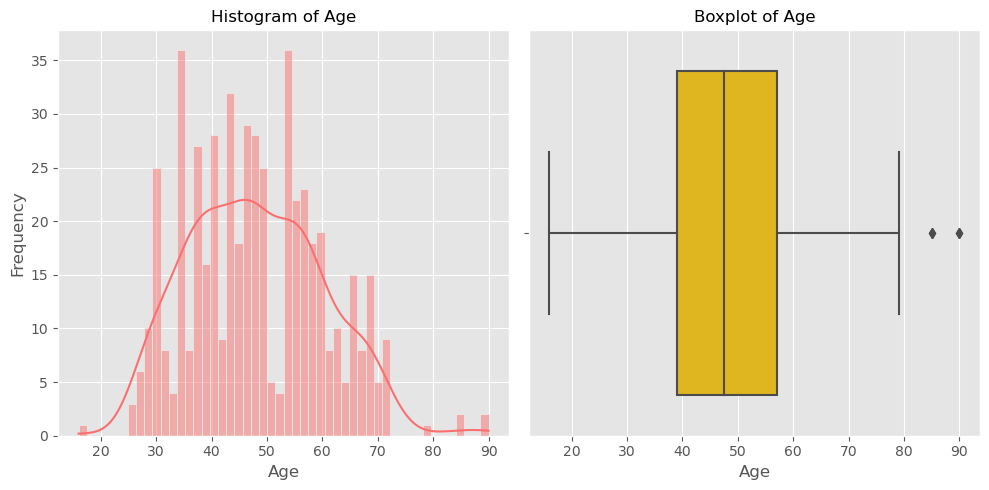

In [7]:
plt.figure(figsize=(10, 5))

numerical = [var for var in data.columns if data[var].dtypes not in ['object']]

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(data[col], kde=True, color='#FA7070', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=data[col], color='#FFC700')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [8]:
numerical = [var for var in data.columns if data[var].dtypes not in ['object']]

from scipy.stats import normaltest

dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(data[feature_name].dropna())
    
    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,Age,9.9659,0.006854,Not Normally Distributed


### **Categorical**

In [9]:
# Defining categorical columns
categorical = [var for var in data.columns if data[var].dtypes in ['object']]

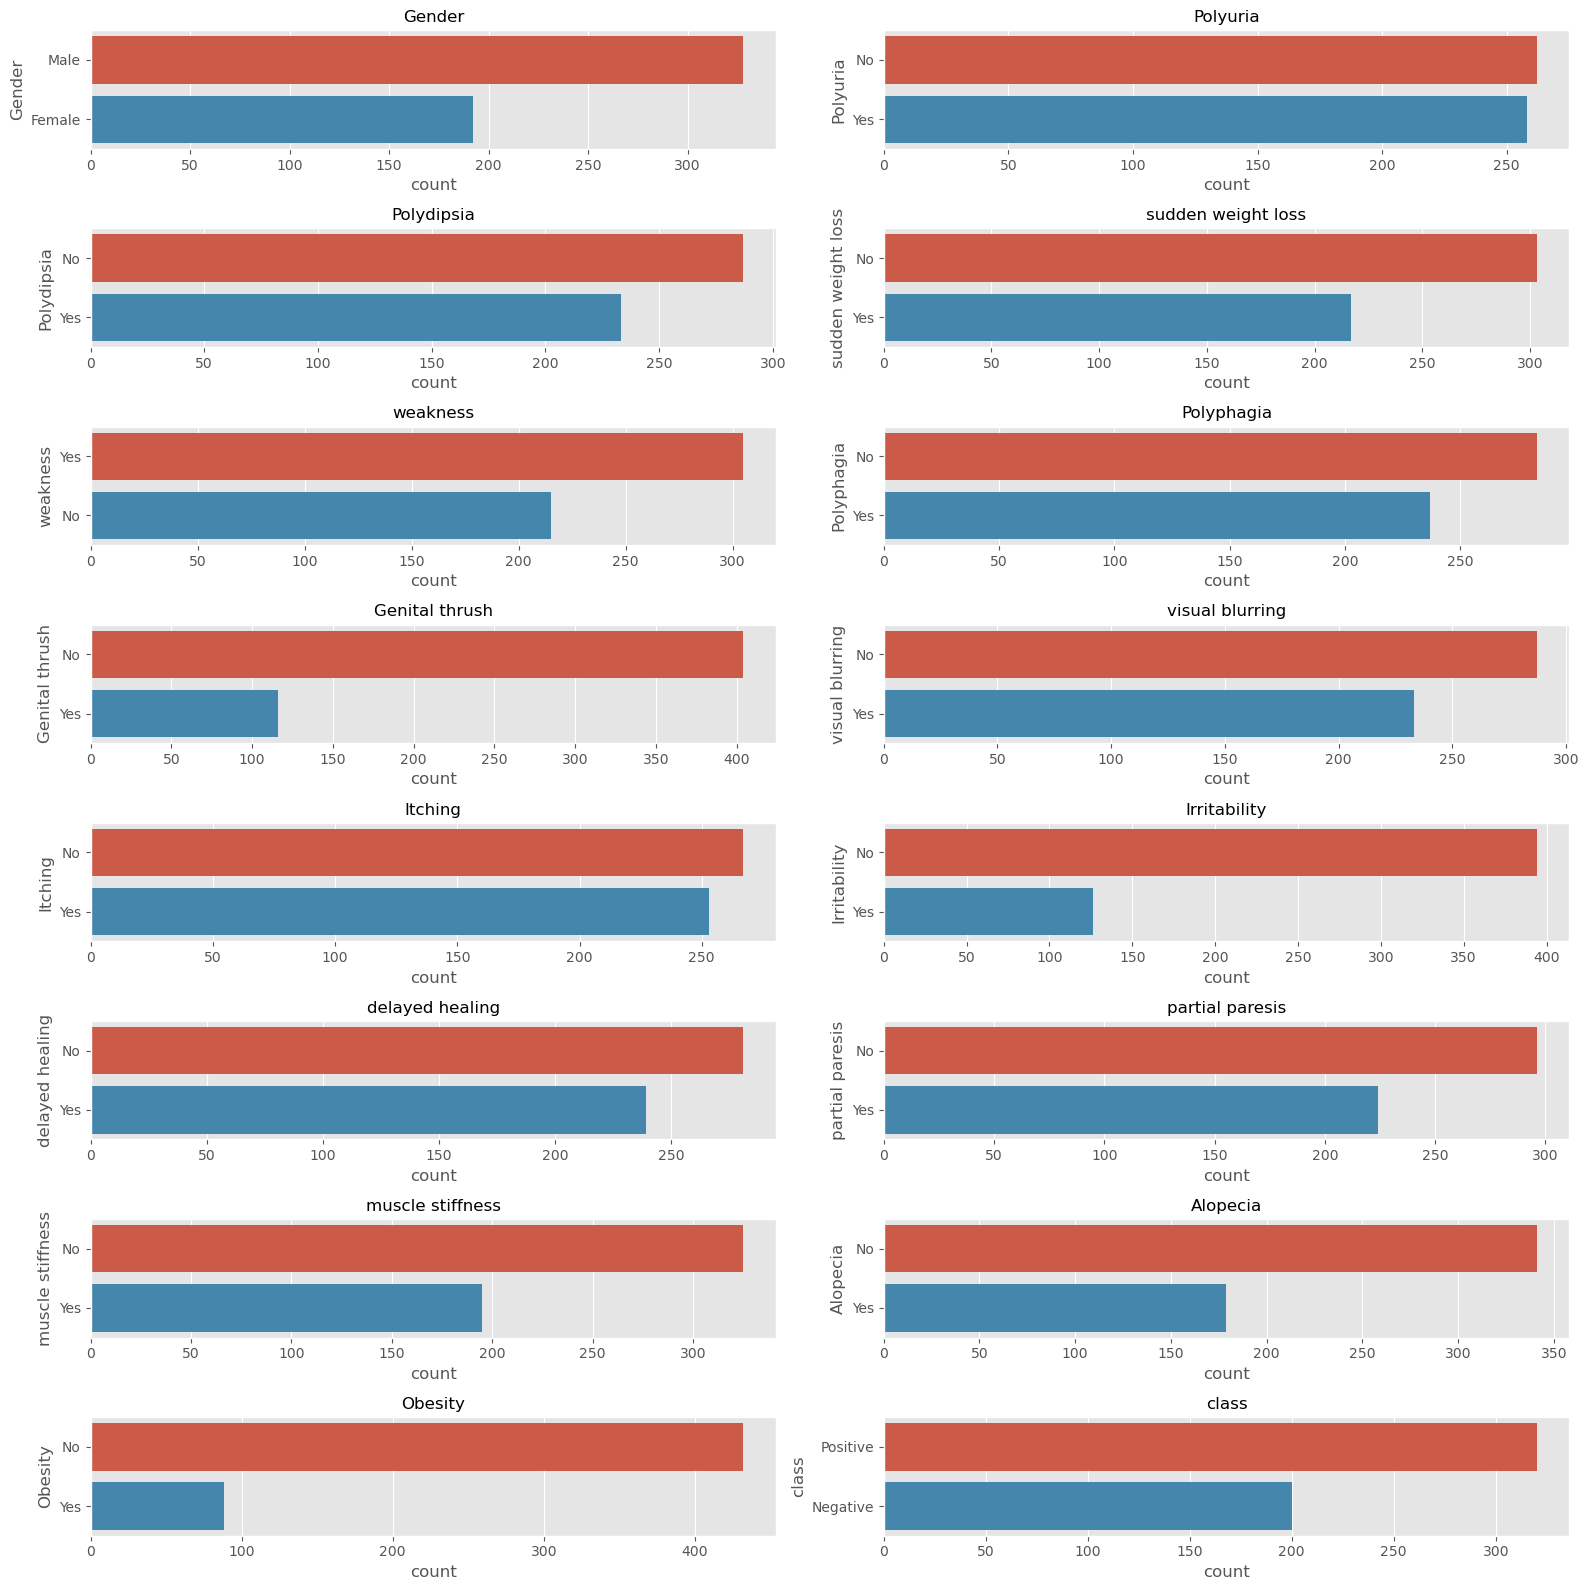

In [10]:
# Visualization of categorical features based on their uniques



fig, axes = plt.subplots(8, 2, figsize=(16, 16)) 
for i, j in zip(categorical, axes.flatten()):
    ax = sns.countplot(data=data, y= i, ax= j, order=data[i].value_counts().index)
    ax.set_title(f'{i}', size = 12) 

plt.tight_layout()
plt.show()

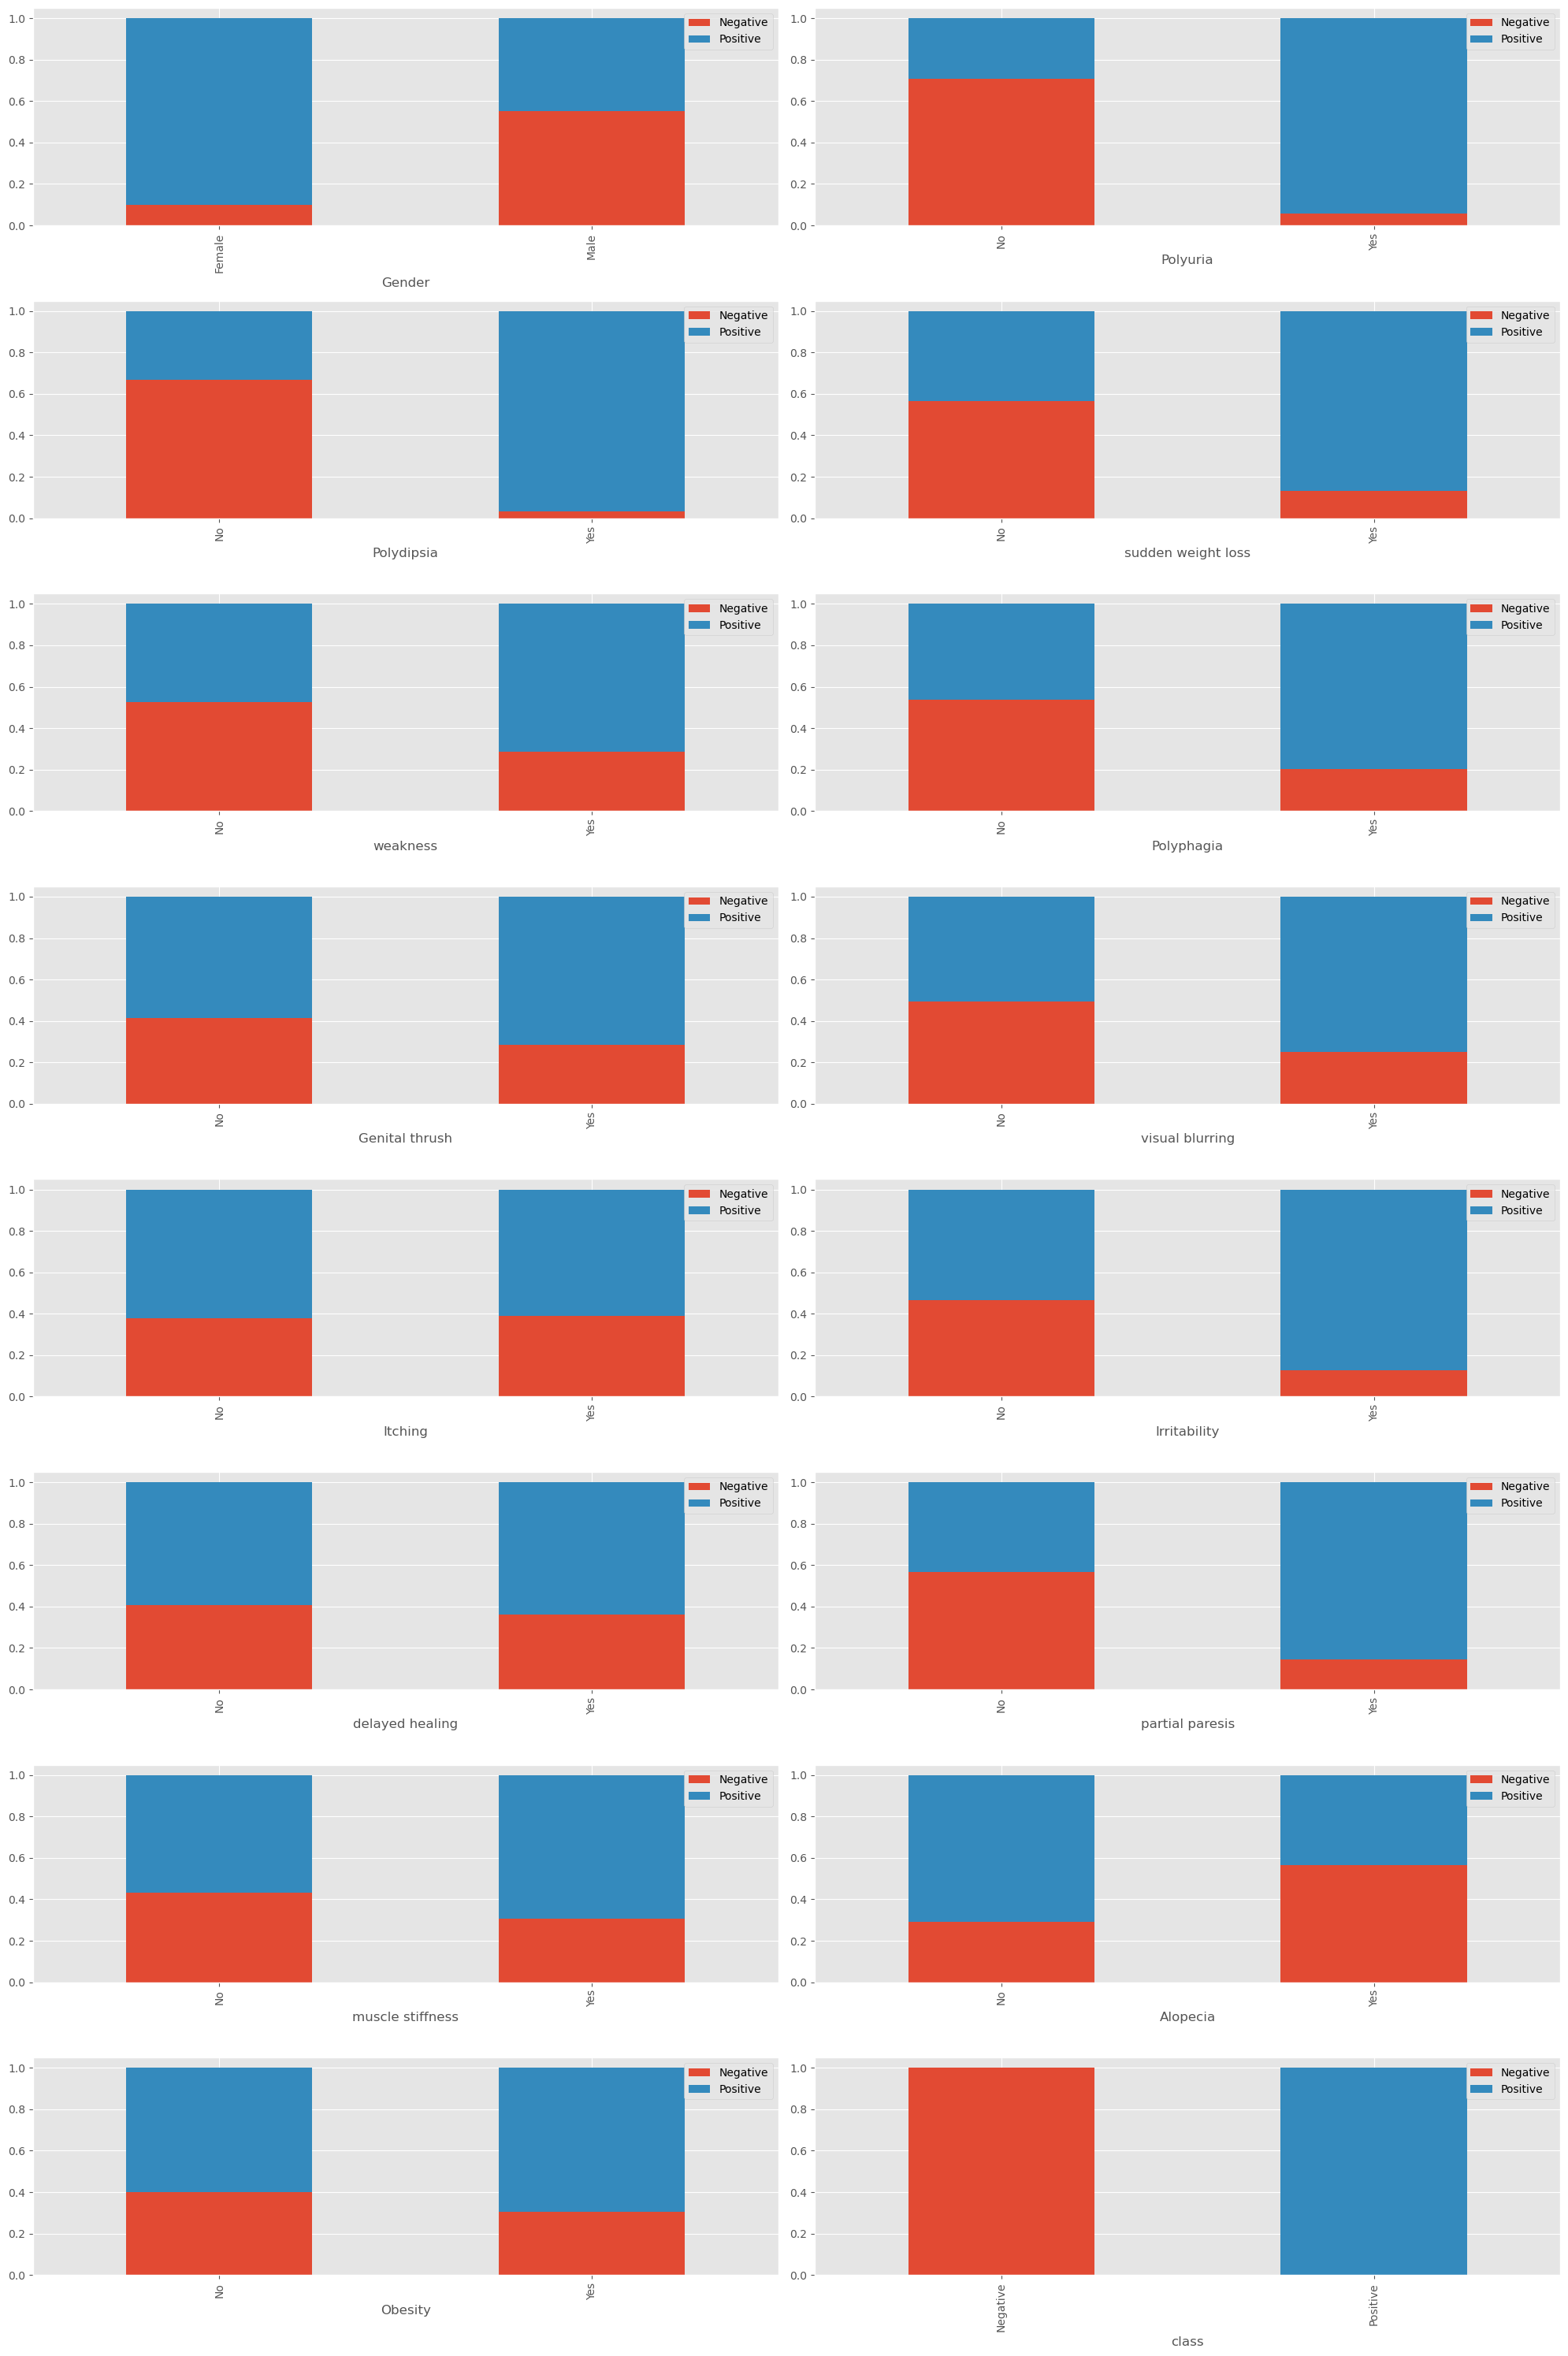

In [11]:
# Visualizing claim proportion of categorical features
count = 0
fig = plt.figure(figsize=(20,30))

for i in data.drop(columns=['Age']).columns:
    count += 1
    ax = plt.subplot(8, 2, count)
    pd.crosstab(data[i], data['class'], normalize=0).plot(kind='bar', stacked=True, ax=ax)
    ax.legend(loc='upper right')  # Position the legend in the upper right corner
    fig.tight_layout()

plt.show()

In [12]:
# Percentage of features vs target
# Table of categorical feature vs target (class)
for col in data.drop(columns=['class', 'Age']).columns:
    # Get the count of each class per categorical feature
    count_data = data.groupby([col, 'class']).size().unstack(fill_value=0)
    
    # Normalize the counts to get proportions
    normalized_data = count_data.div(count_data.sum(axis=1), axis=0)
    
    # Display the sorted values
    display(normalized_data.sort_values(by=['Positive'], ascending=False))

class,Negative,Positive
Gender,,
Female,0.098958,0.901042
Male,0.551829,0.448171


class,Negative,Positive
Polyuria,,
Yes,0.058140,0.941860
No,0.706107,0.293893


class,Negative,Positive
Polydipsia,,
Yes,0.034335,0.965665
No,0.668990,0.331010


class,Negative,Positive
sudden weight loss,,
Yes,0.133641,0.866359
No,0.564356,0.435644


class,Negative,Positive
weakness,,
Yes,0.285246,0.714754
No,0.525581,0.474419


class,Negative,Positive
Polyphagia,,
Yes,0.202532,0.797468
No,0.537102,0.462898


class,Negative,Positive
Genital thrush,,
Yes,0.284483,0.715517
No,0.413366,0.586634


class,Negative,Positive
visual blurring,,
Yes,0.248927,0.751073
No,0.494774,0.505226


class,Negative,Positive
Itching,,
No,0.378277,0.621723
Yes,0.391304,0.608696


class,Negative,Positive
Irritability,,
Yes,0.126984,0.873016
No,0.467005,0.532995


class,Negative,Positive
delayed healing,,
Yes,0.359833,0.640167
No,0.405694,0.594306


class,Negative,Positive
partial paresis,,
Yes,0.142857,0.857143
No,0.567568,0.432432


class,Negative,Positive
muscle stiffness,,
Yes,0.307692,0.692308
No,0.430769,0.569231


class,Negative,Positive
Alopecia,,
No,0.290323,0.709677
Yes,0.564246,0.435754


class,Negative,Positive
Obesity,,
Yes,0.306818,0.693182
No,0.400463,0.599537


## **Data Cleaning**

### **Missing values**

In [13]:
# Calculating missing value from every columns
pd.DataFrame({'Missing values': [data[col].isna().sum() for col in data.columns]}, index=data.columns.values)

,Missing values
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


### **Imbalanced class**

In [14]:
data['class'].value_counts(normalize=True).to_frame()

,proportion
class,
Positive,0.615385
Negative,0.384615


## **Data Analysis**

### **Numerical vs Target**

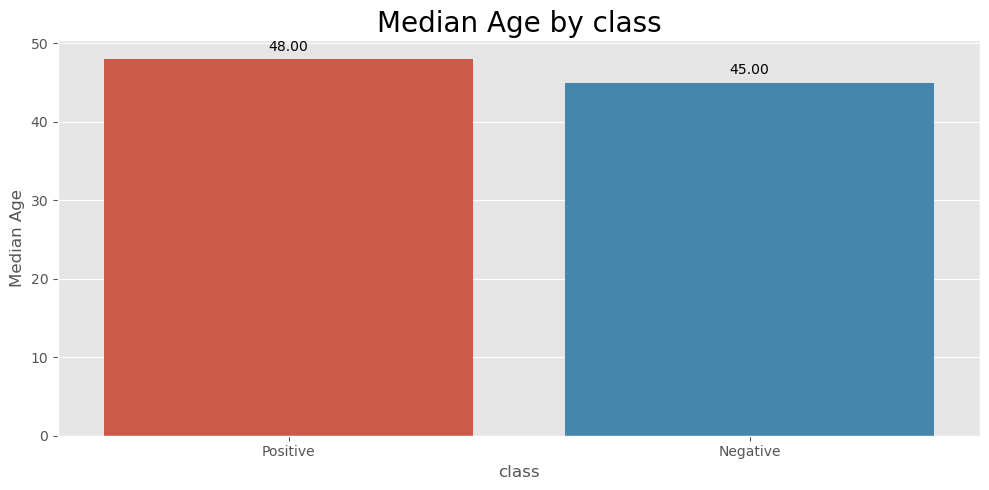

In [15]:
# Setting size
plt.figure(figsize=(10,5))

# Creating bar plot
ax = sns.barplot(data=data,
            x='class',
            y='Age',
            estimator=np.median,
            ci=0)
# annotate
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.ylabel('Median Age')
plt.title('Median Age by class', fontsize=20)
plt.tight_layout()
plt.show()

### **Categorical vs Target**

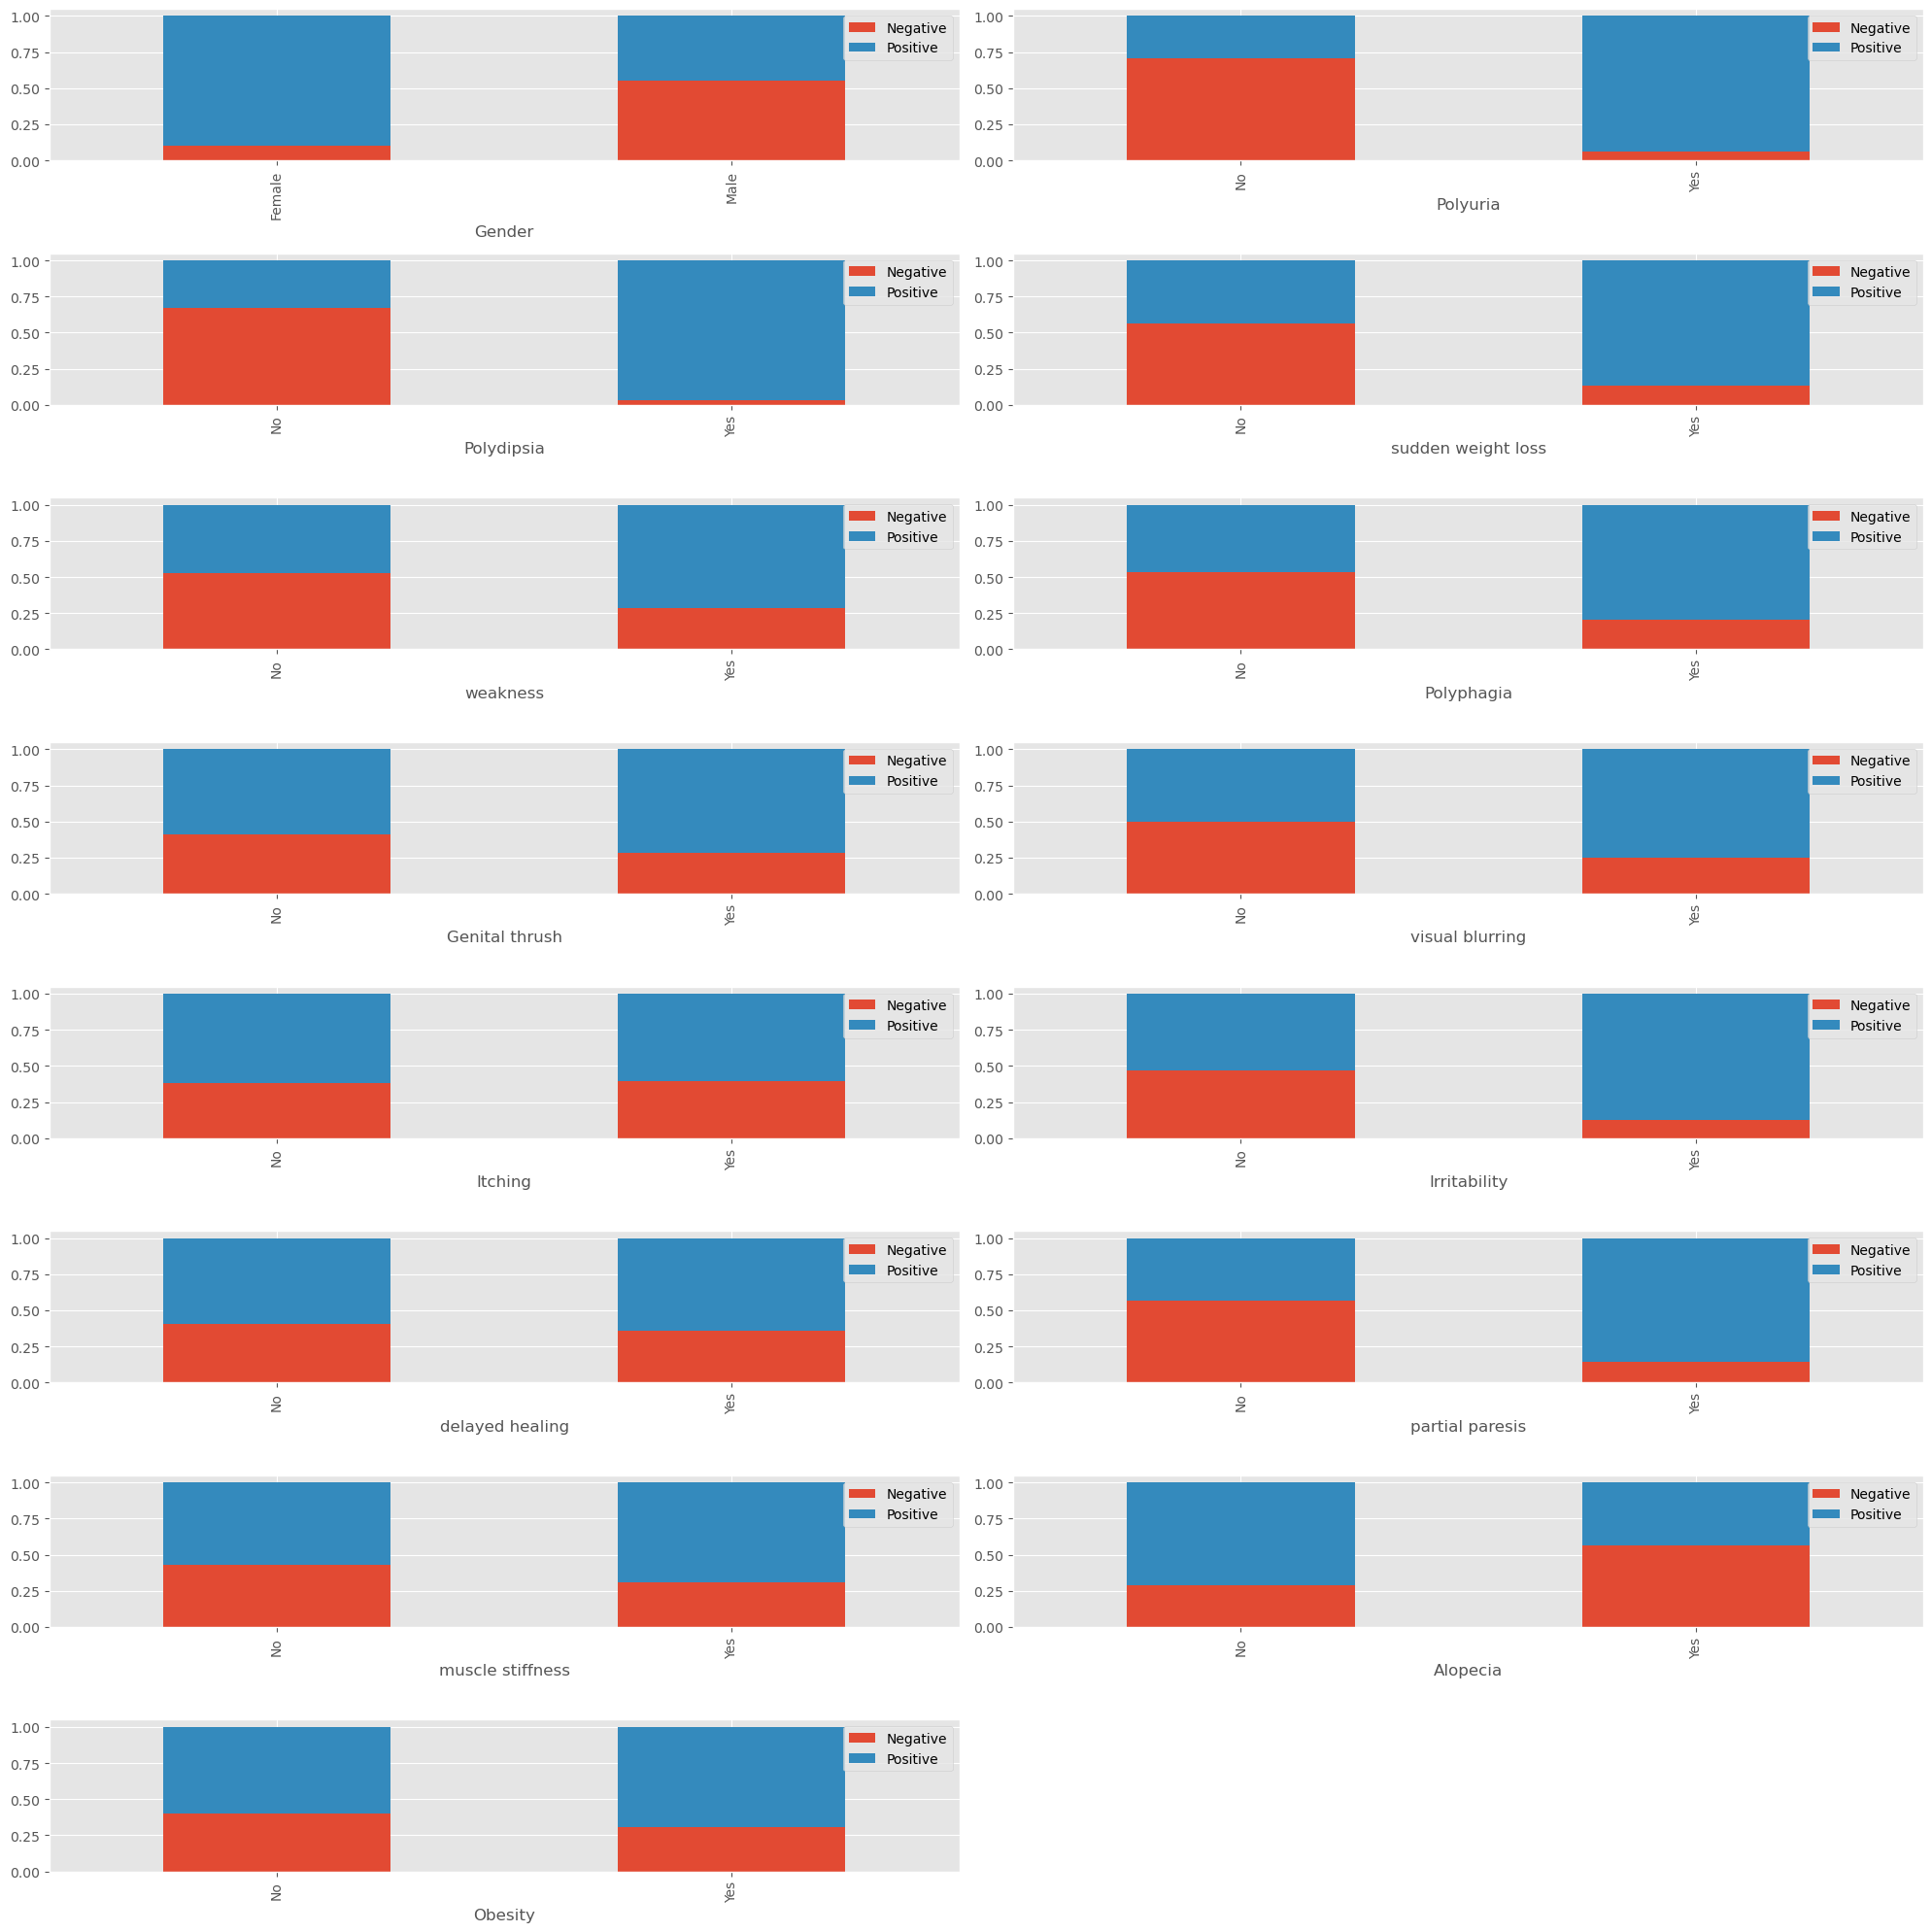

In [16]:
# Visualizing claim proportion of categorical features
count = 0
fig = plt.figure(figsize=(20,20))

for i in data.drop(columns=['class', 'Age']).columns:
    count += 1
    ax = plt.subplot(8, 2, count)
    pd.crosstab(data[i], data['class'], normalize=0).plot(kind='bar', stacked=True, ax=ax)
    ax.legend(loc='upper right')  # Position the legend in the upper right corner
    fig.tight_layout()

plt.show()

In [17]:
# Table of categorical feature vs target (claim)
for i in data.drop(columns=['Age', 'class']).columns:
    categorical_claim_data = data.groupby(i)['class'].value_counts(normalize=True).unstack()
    display(categorical_claim_data.sort_values(by=['Positive'], ascending=False))

class,Negative,Positive
Gender,,
Female,0.098958,0.901042
Male,0.551829,0.448171


class,Negative,Positive
Polyuria,,
Yes,0.058140,0.941860
No,0.706107,0.293893


class,Negative,Positive
Polydipsia,,
Yes,0.034335,0.965665
No,0.668990,0.331010


class,Negative,Positive
sudden weight loss,,
Yes,0.133641,0.866359
No,0.564356,0.435644


class,Negative,Positive
weakness,,
Yes,0.285246,0.714754
No,0.525581,0.474419


class,Negative,Positive
Polyphagia,,
Yes,0.202532,0.797468
No,0.537102,0.462898


class,Negative,Positive
Genital thrush,,
Yes,0.284483,0.715517
No,0.413366,0.586634


class,Negative,Positive
visual blurring,,
Yes,0.248927,0.751073
No,0.494774,0.505226


class,Negative,Positive
Itching,,
No,0.378277,0.621723
Yes,0.391304,0.608696


class,Negative,Positive
Irritability,,
Yes,0.126984,0.873016
No,0.467005,0.532995


class,Negative,Positive
delayed healing,,
Yes,0.359833,0.640167
No,0.405694,0.594306


class,Negative,Positive
partial paresis,,
Yes,0.142857,0.857143
No,0.567568,0.432432


class,Negative,Positive
muscle stiffness,,
Yes,0.307692,0.692308
No,0.430769,0.569231


class,Negative,Positive
Alopecia,,
No,0.290323,0.709677
Yes,0.564246,0.435754


class,Negative,Positive
Obesity,,
Yes,0.306818,0.693182
No,0.400463,0.599537


## **Modeling**

### **Data Preparation**

In [18]:
# Copy
data_patient = data.copy()

In [19]:
# Replacing values
data_patient['class'] = np.where(data_patient['class']=='Positive',1,0)
data_patient['class'].unique()

array([1, 0])

**Define feature and target**

In [20]:
# Define features and target
# Features
X = data_patient.drop(columns='class')

# target
y = data_patient['class']

In [21]:
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [22]:
y.value_counts()

class
1    320
0    200
Name: count, dtype: int64

### **Data Splitting**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

**Feature Engineering**

**Outlier handling**

In [24]:
def winsorize_with_pandas(s, limits):
    return s.clip(lower=s.quantile(limits[0]), 
                  upper=s.quantile(1-limits[1]))

In [25]:
# Outlier Handling
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
from scipy.stats.mstats import winsorize
from typing import Literal


class handling_outliers(BaseEstimator, TransformerMixin):
    def _init_(self):
        pass

    def fit(self, X, y=None):
        self.feature_names_in_ = X.columns
        return self  
    
    def transform(self, X, y=None):
        data_patient = X.copy()
        cols_to_winsorize = ['Age']
        data_patient[cols_to_winsorize] = data_patient[cols_to_winsorize].apply(winsorize_with_pandas, args=([0.01, 0.01],))
        return data_patient
    
    def set_output(self, transform: Literal['default', 'pandas']):
        return super().set_output(transform=transform)

In [26]:
# Column Transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']),
], remainder='passthrough')

In [27]:
# Scaling
scaler = MinMaxScaler()

In [28]:
# Resampling

# Defining SMOTE
smote = SMOTE(random_state=0)

# Defining SMOTENC
smotenc = SMOTENC(random_state=0, categorical_features=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]) #['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       #'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring','Itching', 'Irritability', 'delayed healing', 'partial paresis',
       #'muscle stiffness', 'Alopecia', 'Obesity']

In [29]:
Pipeline([
    ('outlier', handling_outliers()),
    ('transformer', transformer),
    ('scaler', scaler),
    ('resamplers', smotenc)
])

Pipeline(steps=[('outlier', handling_outliers()),
                ('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Polyuria',
                                                   'Polydipsia',
                                                   'sudden weight loss',
                                                   'weakness', 'Polyphagia',
                                                   'Genital thrush',
                                                   'visual blurring', 'Itching',
                                                   'Irritability',
                                                   'delayed healing',
                                                   'partial paresis',
                                                   'muscle stiffness',
                                                   'Alopecia', 'Obesity'])])),
                ('scaler', MinMaxScaler()),
                ('resamplers',
                 SMOTENC(categorical_features=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15],
                         random_state=0))])

In [30]:
# Cross validation
# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

In [31]:
## Machine Learning Algorithmic models
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
grad = GradientBoostingClassifier(random_state=0)
cat = CatBoostClassifier(verbose=False,random_state=0)
xgb = XGBClassifier(random_state=0)
lgbm = LGBMClassifier(random_state=0)

In [32]:
# recall
# Comparing resampling between SMOTENC and SMOTE 

# 10 Models selection
models = [logreg, knn, dtree, rf, ada, grad, cat, xgb, lgbm]

roc_auc_mean_with_smote = []
roc_auc_std_with_smote = []
roc_auc_mean_with_smotenc = []
roc_auc_std_with_smotenc = []

for model in  models :

    # modeling with resampling - smote
    pipe_model_with_smote = Pipeline([
        ('outlier', handling_outliers()),
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', smote),
        ('algo', model)
    ])

    model_cv_with_smote = cross_val_score(
        estimator = pipe_model_with_smote,
        X = X_train,
        y = y_train,
        cv = skf,
        scoring = 'recall',
        n_jobs = -1
    )
    roc_auc_mean_with_smote.append(model_cv_with_smote.mean())
    roc_auc_std_with_smote.append(model_cv_with_smote.std())

    # modeling with resampling - SMOTENC

    pipe_model_with_smotenc = Pipeline([
        ('outlier', handling_outliers()),
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', smotenc),
        ('algo', model)
    ])

    model_cv_with_smotenc = cross_val_score(
        estimator = pipe_model_with_smotenc,
        X = X_train,
        y = y_train,
        cv = skf,
        scoring = 'recall',
        n_jobs = -1
    )
    roc_auc_mean_with_smotenc.append(model_cv_with_smotenc.mean())
    roc_auc_std_with_smotenc.append(model_cv_with_smotenc.std())

In [33]:
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
    'recall_mean_with_smotenc' : roc_auc_mean_with_smotenc,
    'recall_mean_with_smote' : roc_auc_mean_with_smote,
    'recall_std_with_smotenc' : roc_auc_std_with_smotenc,
    'recall_std_with_smote' : roc_auc_std_with_smote,
}).sort_values('recall_mean_with_smotenc', ascending=False)

,model,recall_mean_with_smotenc,recall_mean_with_smote,recall_std_with_smotenc,recall_std_with_smote
3,Random Forest,0.977576,0.968586,0.014376,0.023141
8,LightGBM,0.964242,0.950909,0.022745,0.021736
6,CatBoost,0.955354,0.955354,0.028112,0.028112
5,GradienBoost,0.955253,0.964242,0.020221,0.022745
7,XGBoost,0.946364,0.946364,0.022848,0.033386
2,Decision Tree,0.932929,0.941919,0.020339,0.017939
0,Logistic Regression,0.919596,0.919596,0.017997,0.022835
4,AdaBoost,0.915152,0.906263,0.016757,0.032615
1,KNN,0.910505,0.888182,0.032295,0.025641


In [34]:
# Predicting to test data

mean_recall_test = []

# 10 Models selection
models = [logreg, knn, dtree, rf, ada, grad, cat, xgb, lgbm]

# Mencari model terbaik berdasarkan ROC AUC
for algoritma in models :
    model_pipe = Pipeline([
        ('outlier', handling_outliers()),
        ('prep', transformer),
        ('scaler', scaler), 
        ('resample', smotenc),
        ('algo', algoritma)
    ])

    # fitting
    model_pipe.fit(X_train, y_train)

    # predict
    y_pred = model_pipe.predict(X_test)

    # evaluate
    score = recall_score(y_test, y_pred)
    mean_recall_test.append(score)

[LightGBM] [Info] Number of positive: 224, number of negative: 224
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 448, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [35]:
# Model performance comparison
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
    'mean recall train': roc_auc_mean_with_smotenc, #smote
    'mean recall test': mean_recall_test
}).sort_values('mean recall test', ascending=False)

,model,mean recall train,mean recall test
3,Random Forest,0.977576,0.989583
7,XGBoost,0.946364,0.989583
5,GradienBoost,0.955253,0.968750
6,CatBoost,0.955354,0.968750
8,LightGBM,0.964242,0.968750
2,Decision Tree,0.932929,0.958333
0,Logistic Regression,0.919596,0.947917
4,AdaBoost,0.915152,0.937500
1,KNN,0.910505,0.906250


**Random Forest**

In [36]:
# Y_pred Random Forest
rf_clf = RandomForestClassifier(random_state=0)

model_pipe = Pipeline([
        ('outlier', handling_outliers()),
        ('prep', transformer),
        ('scaler', scaler), 
        ('resample', smotenc),
        ('algo', rf_clf)
    ])


# fitting
model_pipe.fit(X_train, y_train)
    
# predict
y_pred_rf = model_pipe.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        60
           1       0.96      0.99      0.97        96

    accuracy                           0.97       156
   macro avg       0.97      0.96      0.97       156
weighted avg       0.97      0.97      0.97       156



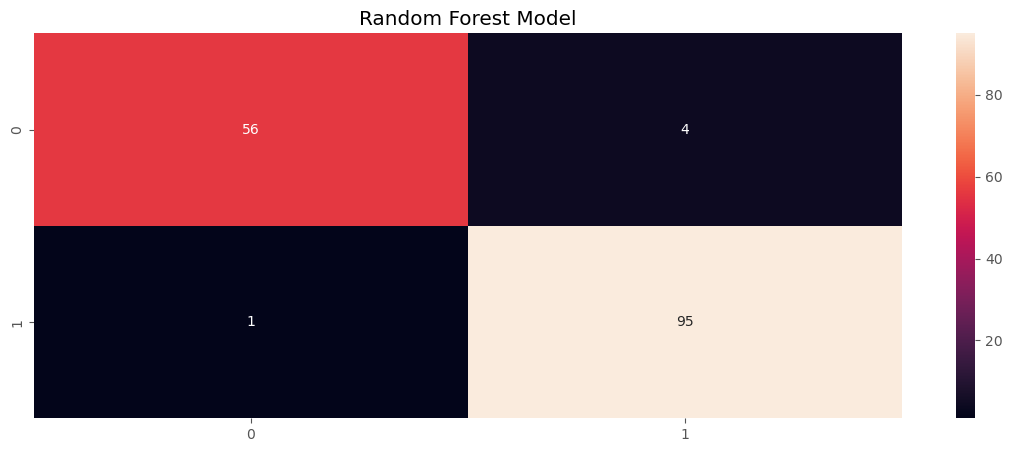

In [38]:
# Confusion matrix of Random forest
# Setting size
plt.figure(figsize=(14,5)) 

# Confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='.0f')
plt.title('Random Forest Model')
plt.show()

### **Hyperparameter tuning**

**Hyperparameter tuning random forest**

In [39]:
# Hyperparameter tuning random forest

# Benchmarck model 1
rf_clf = RandomForestClassifier(random_state=0)

# cv
skfold = StratifiedKFold(n_splits = 5)

# Hyperparameter space random forest

hyperparam_space_rf_clf = [{
    'model__n_estimators' : range(10,101,10),
    'model__max_features' : ['sqrt','log2',None],   #None = auto in new scikit learn
    'model__max_depth' : range(10,101,10),
    'model__min_samples_split': range(2, 21, 2),
    'model__min_samples_leaf': range(1, 21, 2)
}]

# Create the algorithm chains
estimator_rf_clf = Pipeline([
    ('outlier', handling_outliers()),
    ('prep', transformer),
    ('scaler', scaler),
    ('resampler', smotenc), 
    ('model', rf_clf)
    ])

tuned_rf_clf = RandomizedSearchCV(
    estimator_rf_clf, 
    n_jobs=-1, 
    param_distributions=hyperparam_space_rf_clf,
    scoring='recall',
    n_iter=200,
    cv=skfold, 
    random_state=0
    )
# fitting 
tuned_rf_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('outlier', handling_outliers()),
                                             ('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gender',
                                                                                'Polyuria',
                                                                                'Polydipsia',
                                                                                'sudden '
                                                                                'weight '
                                                                                'loss',
                                                                                'weakness',
                                                                                'Polyphagia',
                                                                                'Genital '
                                                                                'thrush',
                                                                                'visual '
                                                                                '...
                                                                            14,
                                                                            15],
                                                      random_state=0)),
                                             ('model',
                                              RandomForestClassifier(random_state=0))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions=[{'model__max_depth': range(10, 101, 10),
                                         'model__max_features': ['sqrt', 'log2',
                                                                 None],
                                         'model__min_samples_leaf': range(1, 21, 2),
                                         'model__min_samples_split': range(2, 21, 2),
                                         'model__n_estimators': range(10, 101, 10)}],
                   random_state=0, scoring='recall')

In [40]:
# score terbaik hasil dari randomized_search
print(f'Recall score pada train set: {tuned_rf_clf.best_score_:.3f}')

# hyperparameter pada score terbaik hasil dari tuned_xgboost
print(f'Best parameter: {tuned_rf_clf.best_params_}')

Recall score pada train set: 0.978
Best parameter: {'model__n_estimators': 30, 'model__min_samples_split': 4, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': 30}


In [41]:
# Model after hyperparameter tuning
tuned_model_rf_clf = tuned_rf_clf.best_estimator_

# Fitting model
tuned_model_rf_clf.fit(X_train, y_train)

# Predict to test set
y_tuned_rf_clf = tuned_model_rf_clf.predict(X_test)

# Evaluate recall score on test set
recall_score(y_test, y_tuned_rf_clf)

0.9895833333333334

In [42]:
print(classification_report(y_test, y_tuned_rf_clf))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        60
           1       0.96      0.99      0.97        96

    accuracy                           0.97       156
   macro avg       0.97      0.96      0.97       156
weighted avg       0.97      0.97      0.97       156



### **Confusion matrix**

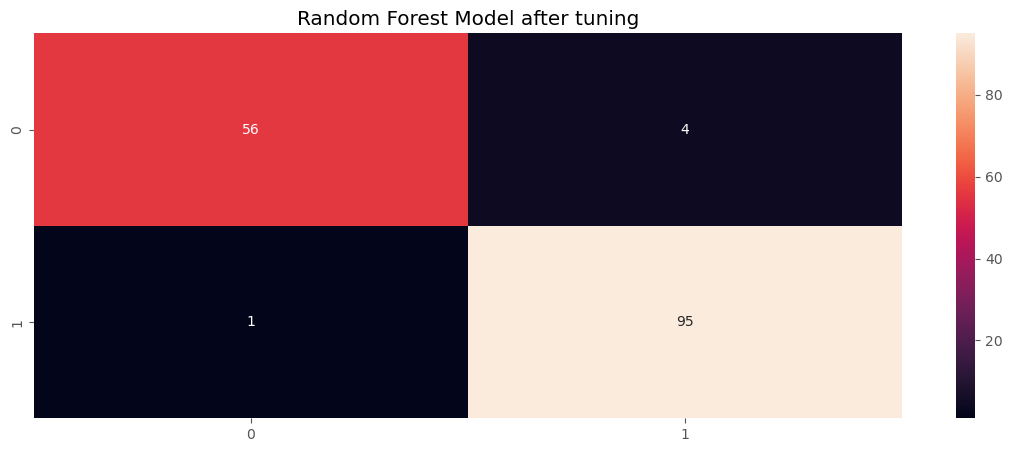

In [43]:
# Confusion matrix visualization of random forest

# Setting size
plt.figure(figsize=(14,5)) 

# Confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_tuned_rf_clf), annot=True, fmt='.0f')
plt.title('Random Forest Model after tuning')
plt.show()

**XG Boost**

In [44]:
# Y_pred Xgboost
xgb_clf = XGBClassifier(random_state=0)
model_pipe = Pipeline([
        ('outlier', handling_outliers()),
        ('prep', transformer),
        ('scaler', scaler), 
        ('resample', smotenc),
        ('algo', xgb_clf)
    ])

# fitting
model_pipe.fit(X_train, y_train)
    
# predict
y_pred_xgboost = model_pipe.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.99      0.99      0.99        96

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



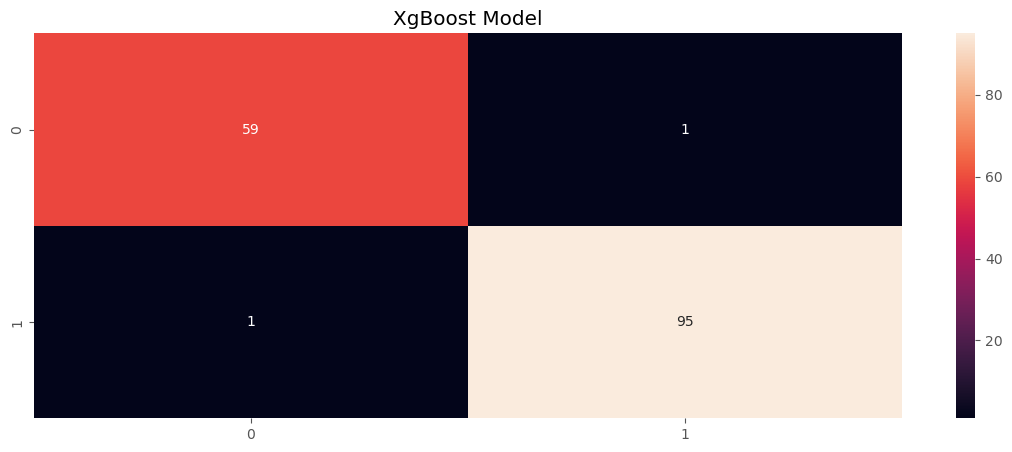

In [46]:
# Confusion matrix of xgboost
# Setting size
plt.figure(figsize=(14,5)) 

# Confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_pred_xgboost), annot=True, fmt='.0f')
plt.title('XgBoost Model')
plt.show()

**Hyperparameter tuning xgboost**

In [47]:
# Hyperparameter tuning Xgboost

# Benchmarck model 1
xgboost = XGBClassifier(random_state=0)

# cv
skfold = StratifiedKFold(n_splits = 5)

# Hyperparameter space Xgboost
hyperparam_space_xgboost = [{
     'model__max_bin': [255, 275, 300, 350],
     'model__num_leaves':[51, 61, 71, 81],
     'model__n_estimators': range(70, 121, 10),
     'model__learning_rate': [0.1, 0.05, 0.03, 0.01],
     'model__scale_pos_weight' : [10, 20, 30]
}]

# Create the algorithm chains
estimator_xgboost = Pipeline([
    ('outlier', handling_outliers()),
    ('prep', transformer),
    ('scaler', scaler),
    ('resampler', smotenc), 
    ('model', xgboost)
    ])

tuned_xgboost = RandomizedSearchCV(
    estimator_xgboost, 
    n_jobs=-1, 
    param_distributions=hyperparam_space_xgboost,
    scoring='recall',
    n_iter=200,
    cv=skfold, 
    random_state=0
    )
# fitting 
tuned_xgboost.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('outlier', handling_outliers()),
                                             ('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gender',
                                                                                'Polyuria',
                                                                                'Polydipsia',
                                                                                'sudden '
                                                                                'weight '
                                                                                'loss',
                                                                                'weakness',
                                                                                'Polyphagia',
                                                                                'Genital '
                                                                                'thrush',
                                                                                'visual '
                                                                                '...
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=0, ...))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions=[{'model__learning_rate': [0.1, 0.05,
                                                                  0.03, 0.01],
                                         'model__max_bin': [255, 275, 300, 350],
                                         'model__n_estimators': range(70, 121, 10),
                                         'model__num_leaves': [51, 61, 71, 81],
                                         'model__scale_pos_weight': [10, 20,
                                                                     30]}],
                   random_state=0, scoring='recall')

In [48]:
# score terbaik hasil dari randomized_search
print(f'Recall score pada train set: {tuned_xgboost.best_score_:.3f}')

# hyperparameter pada score terbaik hasil dari tuned_xgboost
print(f'Best parameter: {tuned_xgboost.best_params_}')

Recall score pada train set: 0.991
Best parameter: {'model__scale_pos_weight': 30, 'model__num_leaves': 81, 'model__n_estimators': 80, 'model__max_bin': 350, 'model__learning_rate': 0.01}


In [49]:
# Model after hyperparameter tuning
tuned_model_xgboost = tuned_xgboost.best_estimator_

# Fitting model
tuned_model_xgboost.fit(X_train, y_train)

# Predict to test set
y_tuned_xgboost = tuned_model_xgboost.predict(X_test)

# Evaluate recall score on test set
recall_score(y_test, y_tuned_xgboost)

1.0

In [50]:
print(classification_report(y_test, y_tuned_xgboost))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        60
           1       0.80      1.00      0.89        96

    accuracy                           0.85       156
   macro avg       0.90      0.80      0.82       156
weighted avg       0.88      0.85      0.84       156



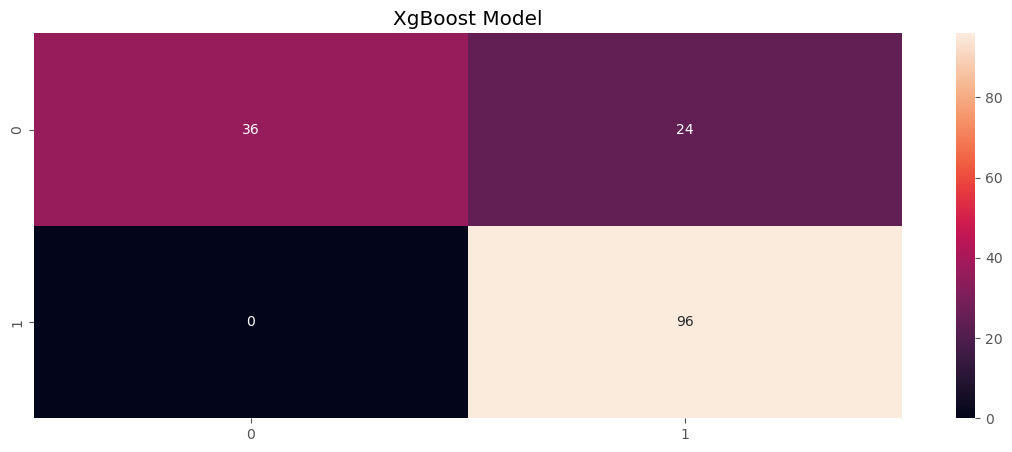

In [51]:
# Confusion matrix visualization of Xgboost

# Setting size
plt.figure(figsize=(14,5)) 

# Confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_tuned_xgboost), annot=True, fmt='.0f')
plt.title('XgBoost Model')
plt.show()

### **Insights of Modelling**

**Overal Recall score comparison**

| Model | Conditions | Train score  | Test score |
| --- | --- | --- | ---|
| Random Forest | Before Tuning |  0.978 | 0.989 |
| Random Forest |  After Tuning | 0.978 | 0.989 | 
| XGBoost Classifier | Before Tuning |  0.946 | 0.989 |
| XGBoost Classifier |  After Tuning | 0.991 | 1.0 | 


**Insight Based on Hyperparameter Tuning Results**
* XGBoost achieved a perfect recall score, indicating it correctly identified all positive cases in the test set. However, it had a higher false positive rate, misclassifying 24 negative cases as positive.
* Random Forest achieved nearly perfect recall with only one false negative, while maintaining a lower false positive rate compared to XGBoost.

**Which Model is Better and Why?**

While XGBoost achieved a perfect recall, it came at the cost of a higher false positive rate. This could lead to more individuals without diabetes being flagged, causing unnecessary concern and potential overuse of medical resources. Random Forest, on the other hand, provided a balanced performance with high recall and a lower false positive rate. Thus, Random Forest is the preferred model due to its reliable and balanced performance.

## **Conclusion**

Despite XGBoost achieving a perfect recall on the test set, we selected Random Forest as the best model due to its balanced performance without significantly compromising other parameters.

### **Conclusion and Insights**
* Early Detection: An app that predicts the risk of diabetes can play a crucial role in early detection and management, especially in resource-limited settings.
* Model Performance: The Random Forest model provided a reliable and balanced performance, making it a suitable choice for deployment.
* Feature Importance: Symptoms such as polyuria, polydipsia, and sudden weight loss are strong indicators of diabetes risk.

### **Recommendations**
* Health Monitoring: Incorporate regular health check-ups and symptom tracking to identify potential risks early.
* Further Research: Explore additional data sources and refine models to enhance prediction accuracy.
* User Education: Educate users about the importance of early detection and the symptoms of diabetes.

## **Deployment**
* We will now deploy the best model of the tuned Random Forest using a Streamlit app, making it accessible for users to assess their diabetes risk conveniently.
* The notebook and streamlite files can be accessed through this [github](https://github.com/harishmuh/Early-Risk-Diabetes-predictor-ML-and-app)
